In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/drive/My Drive/term-deposit-marketing-2020.csv")
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


In [3]:
print('No', round(df['y'].value_counts()[0]/len(df) * 100,2), '% of the data')
print('Yes', round(df['y'].value_counts()[1]/len(df) * 100,2), '% of the data')

No 92.76 % of the data
Yes 7.24 % of the data


In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_balance'] = rob_scaler.fit_transform(df['balance'].values.reshape(-1,1))

df.drop(["balance"], axis=1, inplace=True)

In [5]:
scaled_balance = df['scaled_balance']
df.drop(["scaled_balance"], axis=1, inplace=True)
df.insert(1, 'scaled_balance', scaled_balance)
df.head()

,age,scaled_balance,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,y
0,58,1.372332,management,married,tertiary,no,yes,no,unknown,5,may,261,1,0
1,44,-0.298814,technician,single,secondary,no,yes,no,unknown,5,may,151,1,0
2,33,-0.320158,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,1,0
3,47,0.868775,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,1,0
4,33,-0.320949,unknown,single,unknown,no,no,no,unknown,5,may,198,1,0


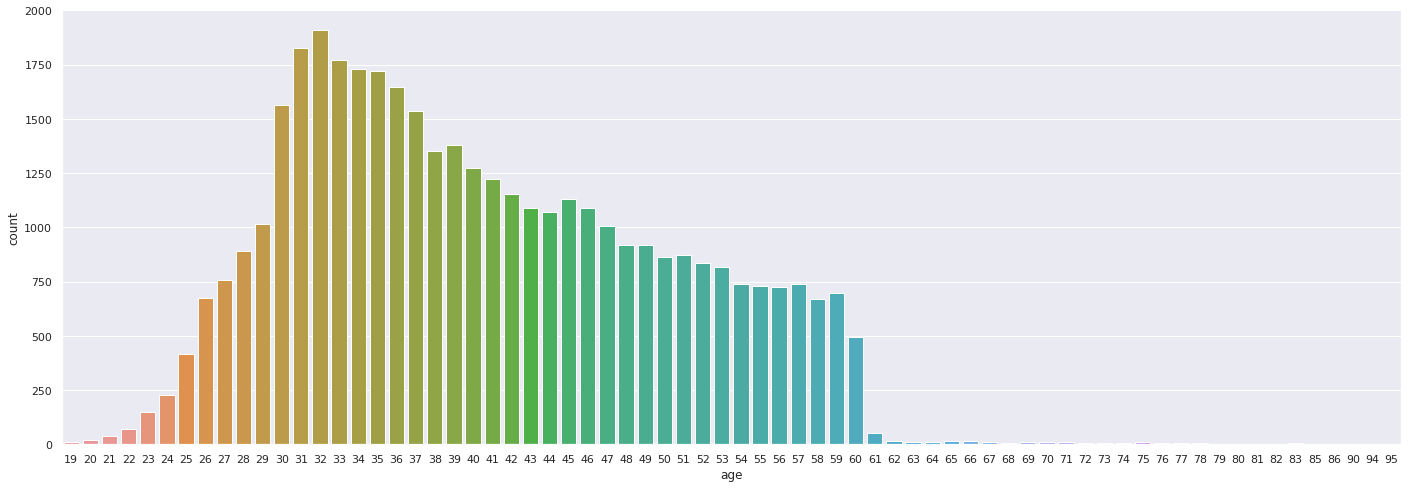

In [6]:
plt.figure(figsize=(24,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="age", data=df)

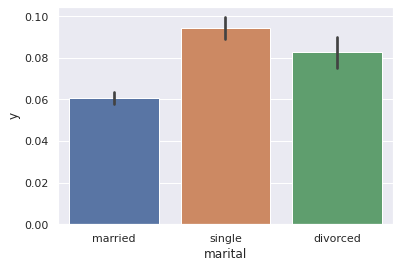

In [7]:
ax = sns.barplot(x="marital", y="y", data=df,
                 order=["married", "single", "divorced"])
#Bekar olan kişilerin vadeli mevduata abone olma ihtimalleri biraz daha fazla.

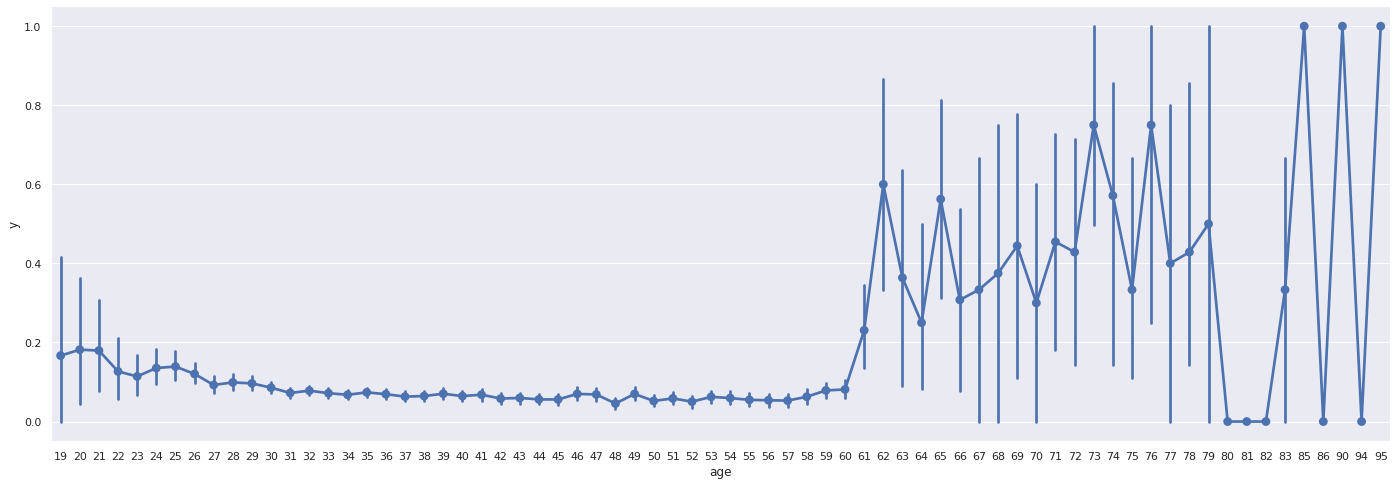

In [8]:
plt.figure(figsize=(24,8))
ax = sns.pointplot(x="age", y="y", data=df)
#Yaşlı insanların abone olma ihtimalleri genç kesime göre daha yüksek.

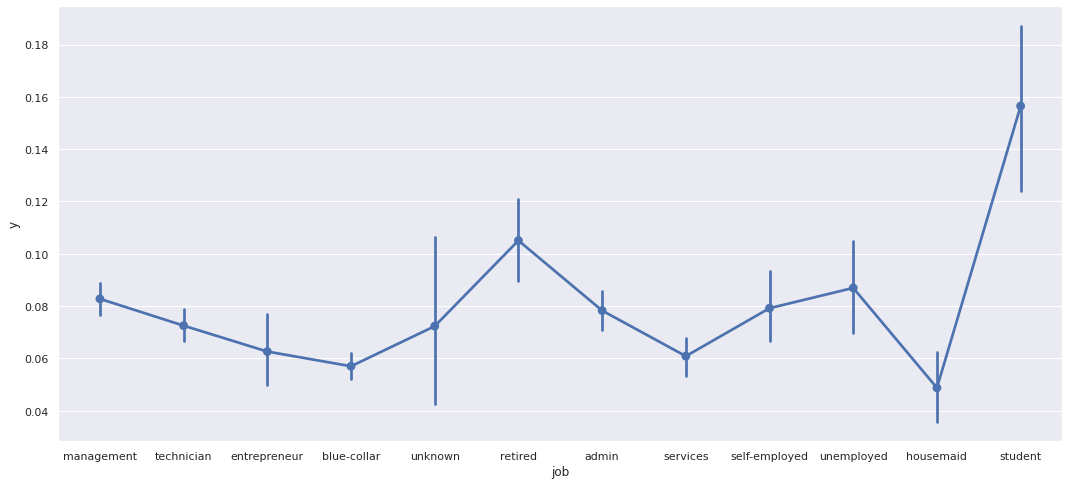

In [9]:
plt.figure(figsize=(18,8))
ax = sns.pointplot(x="job", y="y", data=df)
#Emekli-işsiz-öğrencilerin abone olma ihtimalleri diğer iş gruplarına göre daha yüksek.

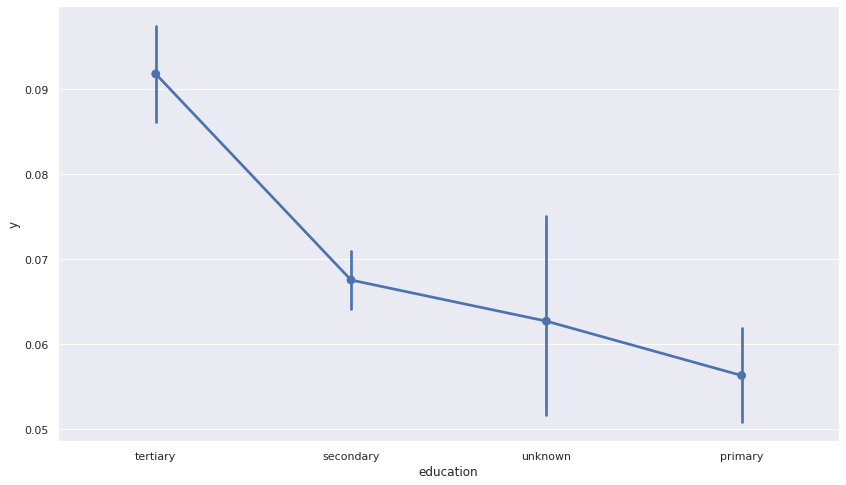

In [10]:
plt.figure(figsize=(14,8))
ax = sns.pointplot(x="education", y="y", data=df)
#Eğitim durumu ve abonelik ihtimali doğru orantılı.

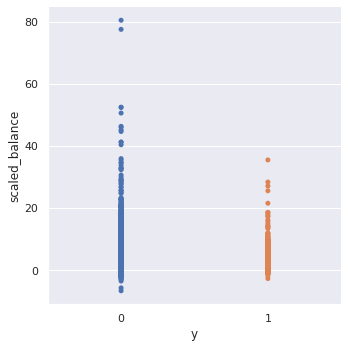

In [11]:
sns.catplot(x="y", y="scaled_balance", jitter=False, data=df);
#Geliri 40000 den fazla olanların abone olma ihtimali düşük. 

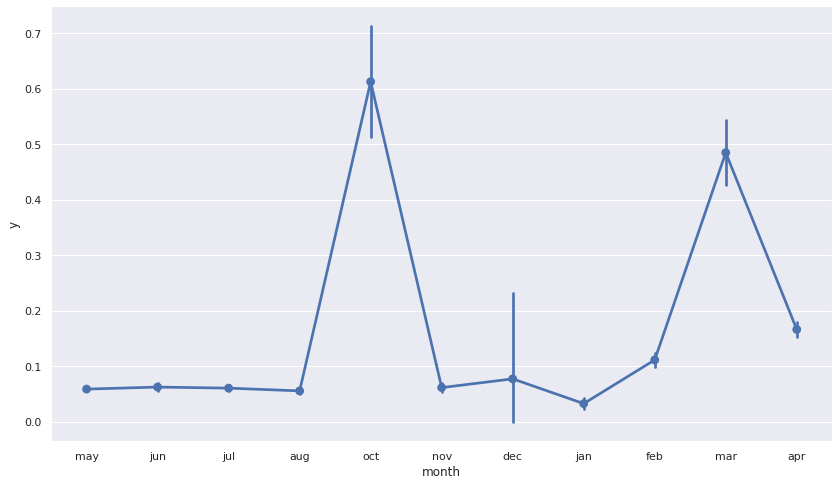

In [12]:
plt.figure(figsize=(14,8))
ax = sns.pointplot(x="month", y="y", data=df)
#Eylül ve mart aylarında abonelik şansı daha yüksek.

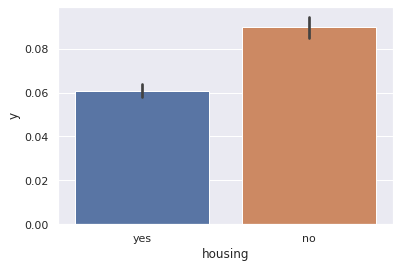

In [13]:
ax = sns.barplot(x="housing", y="y", data=df,
                 order=["yes", "no"])
#Konut kredisi alan kişilerin abone olma ihtimalleri daha zayıf.

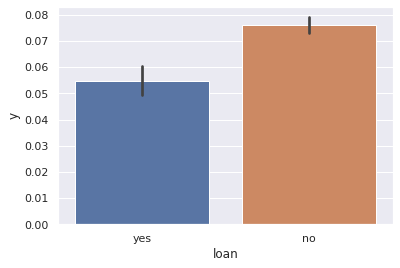

In [14]:
ax = sns.barplot(x="loan", y="y", data=df,
                 order=["yes", "no"])
#Kişisel kredi kullanmayan kişilerin abone olma ihtimalleri daha yüksek.

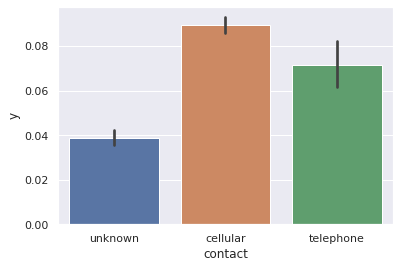

In [15]:
ax = sns.barplot(x="contact", y="y", data=df,
                 order=["unknown", "cellular", "telephone"])
#Hücresel ve telefonla iletişim abone olunma ihtimaline yüksek etki yapıyor.

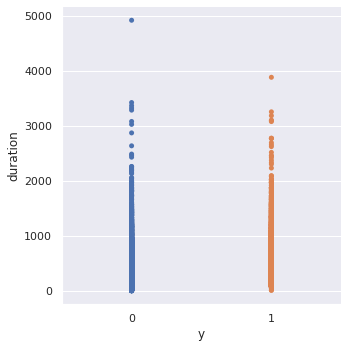

In [16]:
sns.catplot(x="y", y="duration", jitter=False, data=df);

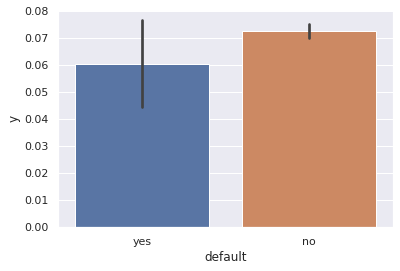

In [17]:
ax = sns.barplot(x="default", y="y", data=df,
                 order=["yes", "no"])
#Default kredisi alan kişilerin abone olma ihtimalleri belli değil.

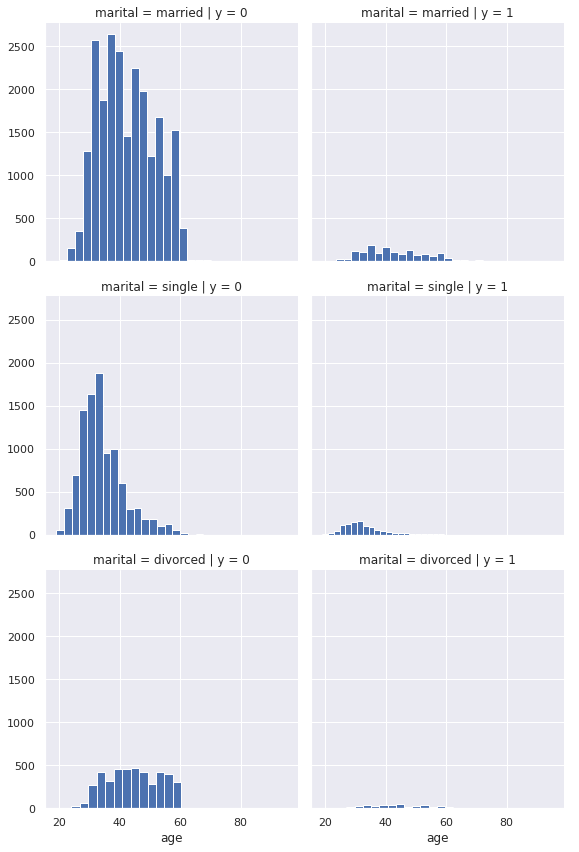

In [18]:
g = sns.FacetGrid(df, col = "y", row = "marital", size = 4)
g.map(plt.hist, "age", bins = 25)
g.add_legend()
plt.show()

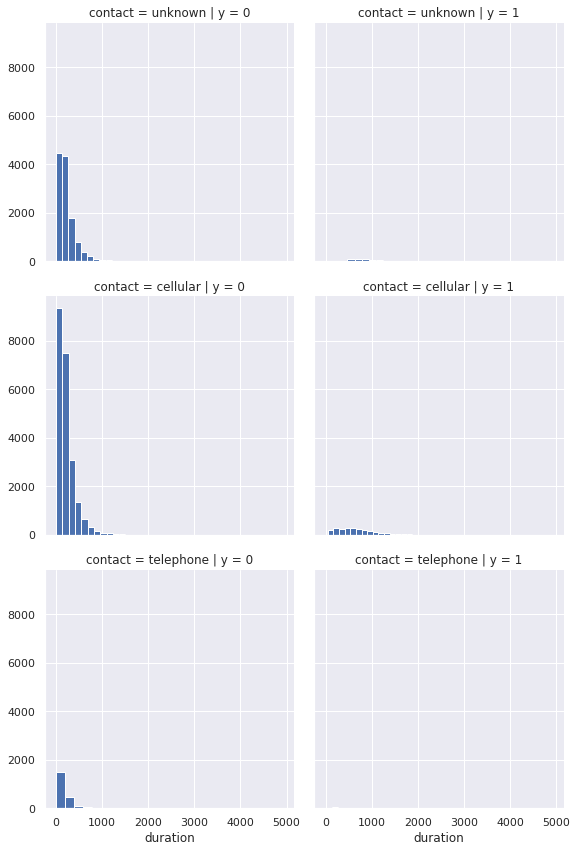

In [19]:
g = sns.FacetGrid(df, col = "y", row = "contact", size = 4)
g.map(plt.hist, "duration", bins = 25)
g.add_legend()
plt.show()

In [20]:
dms = pd.get_dummies(df[["housing", "loan","education","contact","marital"]])
x_ = df.drop(["job", "month", "default", "housing", "loan", "education", "contact", "marital"], axis = 1)
x = pd.concat([x_, dms], axis = 1)

In [21]:
x.head()

,age,scaled_balance,day,duration,campaign,y,housing_no,housing_yes,loan_no,loan_yes,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single
0,58,1.372332,5,261,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
1,44,-0.298814,5,151,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
2,33,-0.320158,5,76,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0
3,47,0.868775,5,92,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
4,33,-0.320949,5,198,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1


In [22]:
x.columns

Index(['age', 'scaled_balance', 'day', 'duration', 'campaign', 'y',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

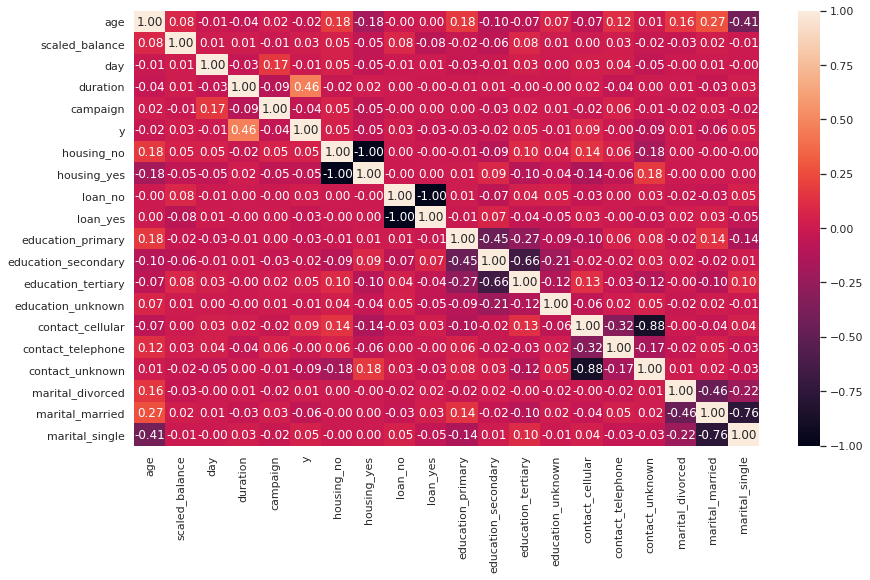

In [23]:
list1 = ['age', 'scaled_balance', 'day', 'duration',
       'campaign', 'y', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'marital_divorced', 'marital_married',
       'marital_single']
plt.figure(figsize=(14,8))
sns.heatmap(x[list1].corr(), annot = True, fmt = ".2f")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost 
import lightgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [25]:
y = x["y"]
x = x.drop(["y"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [26]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    #"KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    #"MLPClassifier": MLPClassifier(),
    #"RandomForestClassifier": RandomForestClassifier()
}

In [31]:
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    #y_pred = classifier.fit(x_train, y_train).predict(x_test)
    #ac = accuracy_score(y_test, y_pred)
    #print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of", round(ac.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 93.0 % accuracy score
Classifiers:  LGBMClassifier Has a training score of 93.0 % accuracy score


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)
log_reg = grid_log_reg.best_estimator_
classifier = log_reg.fit(x_train, y_train)
training_score = cross_val_score(classifier, x_train, y_train, cv=5)
print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

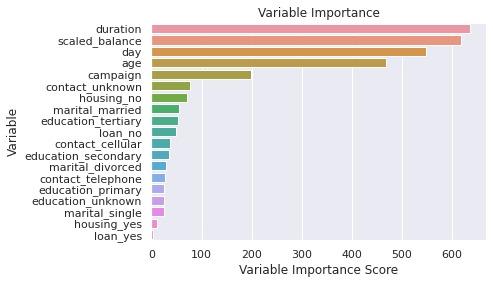

In [32]:
#DEĞİŞKEN ÖNEM DÜZEYİ
feature_imp = pd.Series(classifier.feature_importances_,
                        index = x_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp, y = feature_imp.index)                      
plt.xlabel("Variable Importance Score")
plt.ylabel("Variable")
plt.title("Variable Importance")
plt.show()    

# Hangi Özellikler Daha Çok Dikkate alınmalı?


*   Bekar insanların abone olma ihtimalleri evlilere göre daha yüksek.
*   +60 yaş üstünün abone olma ihtimali genç ve yetişkinlere göre daha yüksek.
*   Eğitim düzeyi ile abone olma ihtimali doğru orantılı.
*   Geliri belirli bir seviyenin üstünde olan insanların abone olma ihtimalleri daha yüksek.
*   Ekim ve mart aylarında abonelikler daha yoğun.
*   İletişim türü abonelik edinmede çok etkili. Hücresel veya telefonla iletişim tercih edilmeli.
*   Ev kredisi tarzı kredileri olan bireylerin abone olma ihtimalleri daha düşük.
*   Kampanyanın etkisi yüksek.
